In [15]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

# 1. Exploring metabolic pathways in KEGG

KEGG is a database resource for understanding high-level functions and utilities of the biological system, such as the cell, the organism and the ecosystem, from molecular-level information, especially large-scale molecular datasets generated by genome sequencing and other high-throughput experimental technologies.

In [6]:
import Bio
from Bio import KEGG
from Bio.KEGG import REST

## 1.1. Get pathways for data on Human system

Some initial codes to 1) access KEGG pathway from Jupyter notebook, 2) get metabolic pathways from KEGG

In [21]:
def get_Kegg_pathways():
    # Retrieve all pathways from KEGG
    result = REST.kegg_list("pathway", "hsa").read()    
    pathway_list=[]
    for i in result.rstrip().split("\n"):
        pathway_list.append(i.split('\t')[0])
    # Retrieve description for each of the pathway
    pathway_description=[]
    for i in result.rstrip().split("\n"):
        pathway_description.append(i.split('\t')[1])
    # Combine pathway names and descriptions as a dataframe
    df_pathway=pd.DataFrame(zip(pathway_list, pathway_description), columns=['pathway_name', 'description'])
    return(df_pathway)

In [12]:
def get_metabolic_from_Kegg_pathways():
     # Retrieve all pathways from KEGG
    result = REST.kegg_list("pathway", "hsa").read()    
    pathway_list=[]
    for i in result.rstrip().split("\n"):
        pathway_list.append(i.split('\t')[0])
    # Retrieve description for each of the pathway
    pathway_description=[]
    for i in result.rstrip().split("\n"):
        pathway_description.append(i.split('\t')[1])
    # Combine pathway names and descriptions as a dataframe
    df_pathway=pd.DataFrame(zip(pathway_list, pathway_description), columns=['pathway_name', 'description'])
    metabolic_list=[]
    # loop over pathway list from above and only look for metabolic pathways
    for i in pathway_list:
        pathway_file = REST.kegg_get(i).read()
        for line in pathway_file.rstrip().split("\n"):
            if line[:12].strip() =='CLASS': 
                if 'Metabolism' in line:
                    metabolic_list.append(i) 
    df_metabolic_pathway=df_pathway[df_pathway.pathway_name.isin(metabolic_list)]
    return(df_metabolic_pathway)

First, we run the first routine, to get out a dataframe (`df_pathway`) containing all the pathways in KEGG and then a second routine to extract a dataframe only containing metabolic pathways  (`df_metabolic_pathway`)

### 1.1.1.  Visualize in a table all pathway information

In [32]:
get_Kegg_pathways()

,pathway_name,description
0,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...
1,path:hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human)
2,path:hsa00030,Pentose phosphate pathway - Homo sapiens (human)
3,path:hsa00040,Pentose and glucuronate interconversions - Hom...
4,path:hsa00051,Fructose and mannose metabolism - Homo sapiens...
5,path:hsa00052,Galactose metabolism - Homo sapiens (human)
6,path:hsa00053,Ascorbate and aldarate metabolism - Homo sapie...
7,path:hsa00061,Fatty acid biosynthesis - Homo sapiens (human)
8,path:hsa00062,Fatty acid elongation - Homo sapiens (human)
9,path:hsa00071,Fatty acid degradation - Homo sapiens (human)


### 1.1.2. Visualize in a table the different metabolic pathway information

In [13]:
#This might take a while to run
get_metabolic_from_Kegg_pathways()

,pathway_name,description
0,path:hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...
1,path:hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human)
2,path:hsa00030,Pentose phosphate pathway - Homo sapiens (human)
3,path:hsa00040,Pentose and glucuronate interconversions - Hom...
4,path:hsa00051,Fructose and mannose metabolism - Homo sapiens...
5,path:hsa00052,Galactose metabolism - Homo sapiens (human)
6,path:hsa00053,Ascorbate and aldarate metabolism - Homo sapie...
7,path:hsa00061,Fatty acid biosynthesis - Homo sapiens (human)
8,path:hsa00062,Fatty acid elongation - Homo sapiens (human)
9,path:hsa00071,Fatty acid degradation - Homo sapiens (human)


## 1.2. Visualize a specific metabolic pathway (TCA cycle) in KEGG:

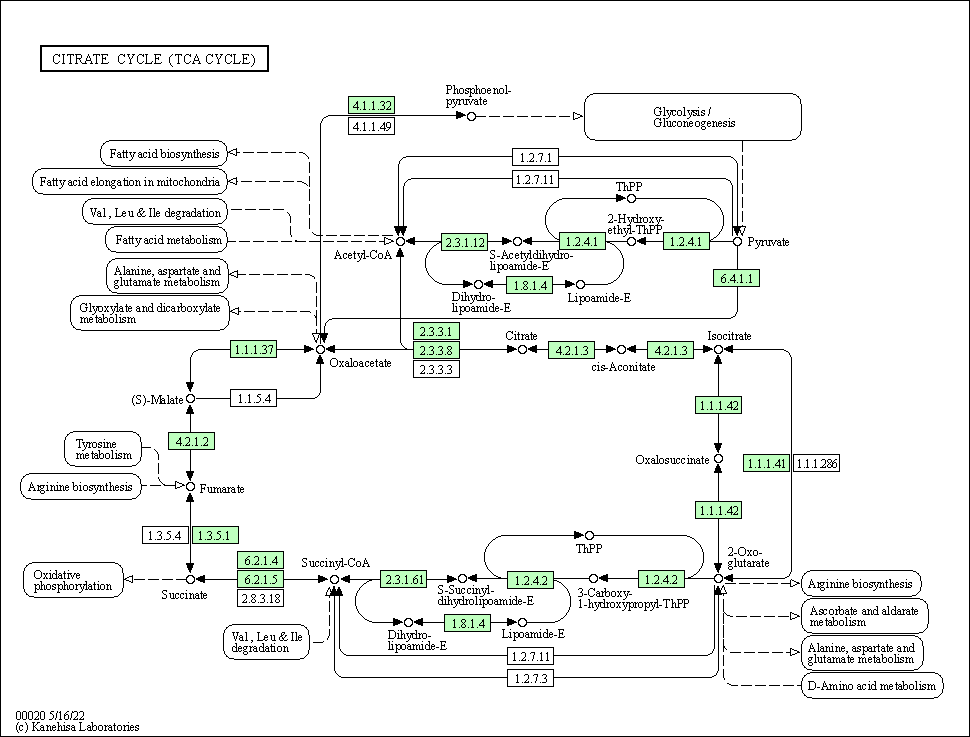

In [16]:
result = REST.kegg_get("hsa00020", "image").read()
Image(result)

## 1.3. Print out members in the TCA cycle:

In [19]:
def get_compounds_in_TCA_cycle():
    TCA_compounds=[]
    current_section = None
    TCA_cycle = REST.kegg_get('path:hsa00020').read() 
    for line in TCA_cycle.rstrip().split("\n"):
        section = line[:12].strip()  # section names are within 12 columns
        if not section == "":
            current_section = section
        if current_section == "COMPOUND":
            TCA_compounds.append(line[12:].split("  ")[1])
    return(TCA_compounds)

In [20]:
get_compounds_in_TCA_cycle()

['Pyruvate',
 'Acetyl-CoA',
 '2-Oxoglutarate',
 'Oxaloacetate',
 'Succinate',
 'Thiamin diphosphate',
 'Phosphoenolpyruvate',
 'Succinyl-CoA',
 'Fumarate',
 '(S)-Malate',
 'Citrate',
 'Isocitrate',
 'cis-Aconitate',
 '2-(alpha-Hydroxyethyl)thiamine diphosphate',
 'Oxalosuccinate',
 '3-Carboxy-1-hydroxypropyl-ThPP',
 'Enzyme N6-(lipoyl)lysine',
 'Enzyme N6-(dihydrolipoyl)lysine',
 '[Dihydrolipoyllysine-residue succinyltransferase] S-succinyldihydrolipoyllysine',
 '[Dihydrolipoyllysine-residue acetyltransferase] S-acetyldihydrolipoyllysine']

## Exercise: Pull out the visualization for Glycolysis/Gluconeogenesis (pathway name is path:hsa00010)

# 2. Exploring Recon3D database

`Recon3D` is an updated and expanded human metabolic network reconstruction that integrates pharmacogenomic associations, large-scale phenotypic data, and structural information for both proteins and metabolites. Recon3D can be used to functionally characterize mutations associated with disease, and identify metabolic response signatures that are caused by exposure to certain drugs. `Recon3D` represents the most comprehensive human metabolic network model to date, accounting for 3,288 open reading frames, 13,543 metabolic reactions involving 4,140 unique metabolites, and 12,890 protein structures. These data provide a unique resource for investigating molecular mechanisms of human metabolism.

In [24]:
#Load the Recon3D reaction dataframe
df_recon3d=pd.read_excel('../../Desktop/EBrunk/Review paper/Supplementary Data File S2.xlsx', sheet_name='Table S12')

In [25]:
#Load the Recon3D metabolite dataframe
df_recon3d_metabolites=pd.read_excel('../../Desktop/EBrunk/Review paper/Supplementary Data File S2.xlsx', sheet_name='Table S15')

Across all the columns, `m_subsystem` is the subsystem that a reaction and its associated genes and compounds are involved in. We can see each subsystem as an individual pathway.

## 2.1. List all the subsystems in the Recon3D database

In [61]:
df_recon3d.m_subsystem.unique().tolist()

['Beta-Alanine metabolism',
 'Transport, extracellular',
 'Eicosanoid metabolism',
 'Steroid metabolism',
 'Vitamin D metabolism',
 'Glycine, serine, alanine and threonine metabolism',
 'Methionine and cysteine metabolism',
 'Lysine metabolism',
 'Valine, leucine, and isoleucine metabolism',
 'Propanoate metabolism',
 'Fatty acid oxidation',
 'Tryptophan metabolism',
 'Tyrosine metabolism',
 'Transport, mitochondrial',
 'Sphingolipid metabolism',
 'Butanoate metabolism',
 'Purine catabolism',
 'Taurine and hypotaurine metabolism',
 'Arginine and proline metabolism',
 'Cytochrome metabolism',
 'O-glycan metabolism',
 'Blood group synthesis',
 'Glutamate metabolism',
 'Transport, lysosomal',
 'Cholesterol metabolism',
 'Transport, endoplasmic reticular',
 'Exchange/demand reaction',
 'Aminosugar metabolism',
 'Phosphatidylinositol phosphate metabolism',
 'Urea cycle',
 'Glycerophospholipid metabolism',
 'Citric acid cycle',
 'Pyruvate metabolism',
 'Vitamin B2 metabolism',
 'Glycolysis/g

## 2.2.  Pull out all the genes involved in citric acid cycle (TCA cycle)

In [311]:
df_recon3d[df_recon3d.m_subsystem=='Citric acid cycle'].u_gene_name.unique()

array(['ACLY', 'ACO1', 'DLST', 'DLD', 'CLYBL', 'CS', 'FH', 'IDH3A',
       'IDH3B', 'IDH3G', 'IDH1', 'IDH2', 'MDH1B', 'MDH1', 'MDH2', 'GPT',
       'GPT2', 'SDHB', 'SDHC', 'SDHD', 'SUCLG1', 'SUCLG2', 'SUCLA2'],
      dtype=object)

## 2.3.  Visualize the citric acid cycle subsystem(each node is a metabolite; two metabolites are bridged by an edge if they exist in a common reaction:

A chunk of codes preparing for `TCA cycle` visualization:

In [28]:
dict_citric_acid_cycle={}
for k in df_recon3d[df_recon3d.m_subsystem=='Citric acid cycle'].m_metabolites.unique().tolist():
    dict_citric_acid_cycle[df_recon3d.loc[df_recon3d.m_metabolites==k, 'm_reaction'].tolist()[0]]= [i for i in k.split("'") if i not in  ['[',  ', ', ']', 'h2o[c]', 'h[c]', 'nad[m]', 'nadh[m]', 'nadph[c]', 'nadh[c]', 'h2o[m]', 'nadh[c]', 'nadp[c]', 'o2[c]', 'nad[c]', 'co2[c]', 'h[m]', 'coa[c]', 'coa[m]', 'co2[m]']]
#Import networkx package for creating graphs
import networkx as nx
G1 = nx.MultiGraph() 
list_citric_acid_cycle =[] # create empty list
for val in dict_citric_acid_cycle.values():
    for i in val:
        if i in list_citric_acid_cycle: 
            continue
        else:
            list_citric_acid_cycle.append(i)
list_citric_acid_cycle_name=[]
for i in list_citric_acid_cycle:
    list_citric_acid_cycle_name.append(df_recon3d_metabolites.loc[df_recon3d_metabolites['BiGG ID']==i, 'Name'].tolist()[0])
df_1=pd.DataFrame(zip(list_citric_acid_cycle,list_citric_acid_cycle_name), columns=['bigg_ID', 'Name'])
df_2=df_1.drop_duplicates('Name')
# Add nodes and node attributes
for i in df_2.Name.tolist():
    G1.add_node(i)
from itertools import combinations
list_combination=list(combinations(df_2.bigg_ID.tolist(), 2))
for i in list_combination:
    for k in dict_citric_acid_cycle.keys():
        if all(item in dict_citric_acid_cycle[k] for item in  list(i)):
            G1.add_edge(df_1.loc[df_1.bigg_ID==i[0], 'Name'].tolist()[0],  df_1.loc[df_1.bigg_ID==i[1], 'Name'].tolist()[0])

The actual codes to make the TCA cycle plot:

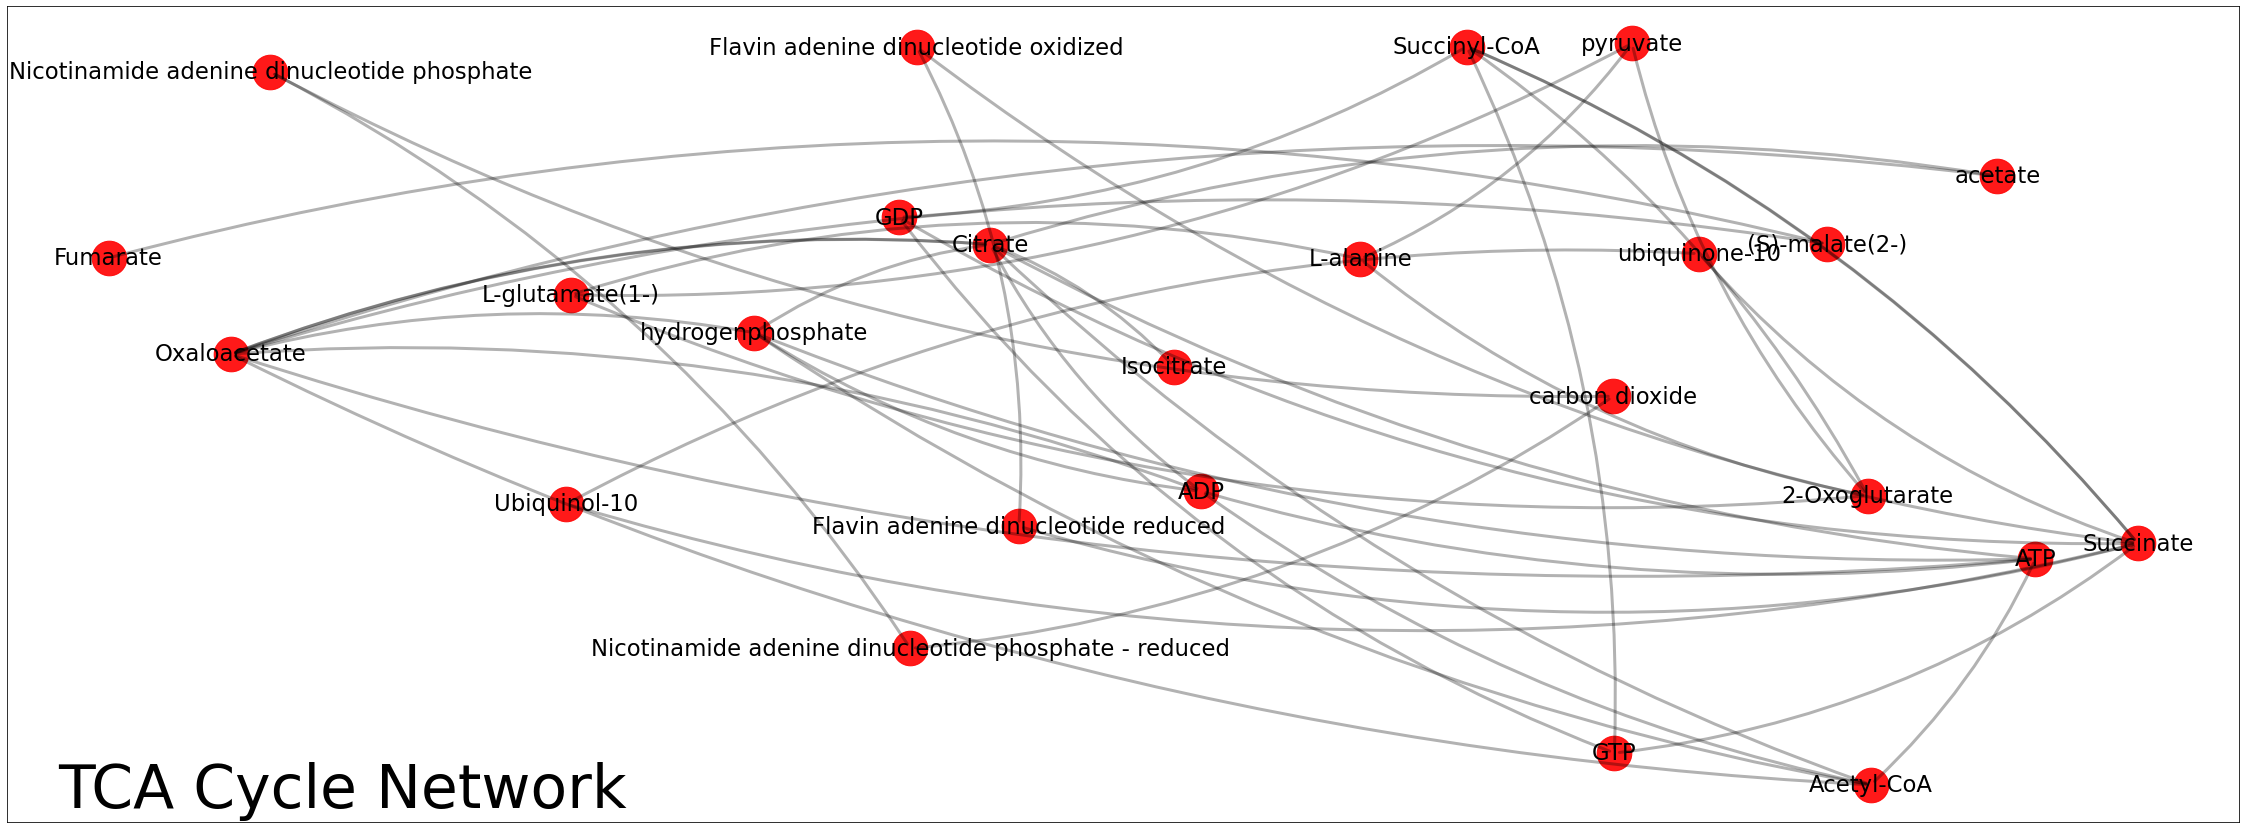

In [29]:
pos = nx.random_layout(G1, seed=6)
nx.draw_networkx_nodes(G1, pos, node_color = 'r', node_size = 1200, alpha = 0.9)
nx.draw_networkx_labels(G1,pos, font_size=22.7, font_color='black')
plt.rcParams['figure.figsize'] = (40, 15)
ax = plt.gca()
for e in range(0, len(list(G1.edges()))):
    ax.annotate("",
                xy=pos[list(G1.edges())[e][0]],
                xytext=pos[list(G1.edges())[e][1]],
                arrowprops=dict(arrowstyle="-",
                                alpha=0.3, lw=3, shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.001*e+0.1))
                                ),
                               )
plt.title('TCA Cycle Network', x=0.15, y=0.01, fontsize=60)
plt.show()

## Exercise: Pull out all the genes involved in Glycolysis / Gluconeogenesis subsystem from Recon3D:

Now we are going to check how many compounds in the TCA cycle are covered by CCLE Metabolomics dataset. CCLE (the Cancer Cell Line Encyclopedia) houses over 1,000 mutationally profiled cancer cell lines and their functional multi-omics data. The CCLE metabolomics dataset has data for metabolites in different cancer cell lines

Load the CCLE Metabolomics dataset:

In [34]:
df_ccle_metabolomics=pd.read_csv('/Volumes/SSD_Yue/DepMap_Downloads/Metabolomics.csv')
df_ccle_metabolomics.index=df_ccle_metabolomics.iloc[:, 0]
df_ccle_metabolomics.drop('Unnamed: 0', axis=1, inplace=True)

After comparison, 4 metabolites in TCA cycle are covered in CCLE Metabolomics dataset, which are `Citrate`, `Fumarate`, `Succinate`, and `L-alanine`. Now, we are going to annotate them as yellow nodes on the TCA cycle plot:

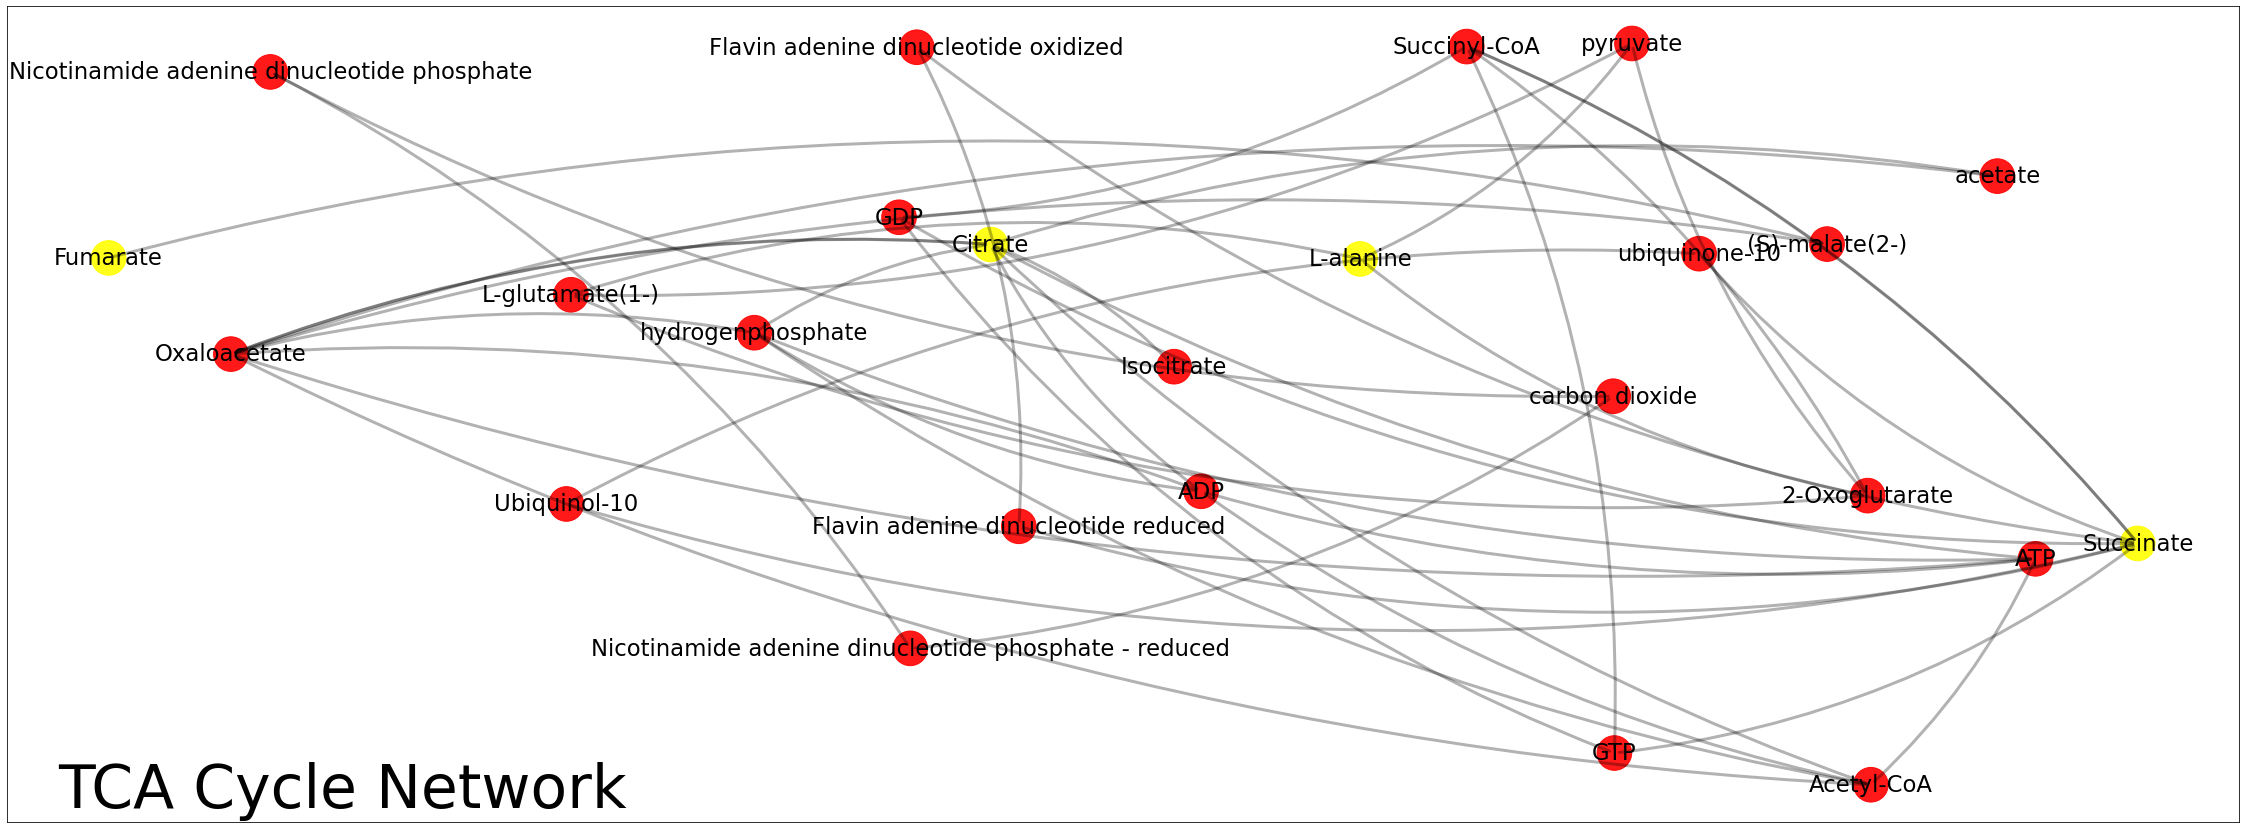

In [42]:
color_map=[]
for node in G1:
    if node in ['Citrate', 'Fumarate', 'Succinate', 'L-alanine']:
        color_map.append('yellow')
    else: 
        color_map.append('red') 
pos = nx.random_layout(G1, seed=6)
nx.draw_networkx_nodes(G1, pos, node_color = color_map, node_size = 1200, alpha = 0.9)
nx.draw_networkx_labels(G1,pos, font_size=22.7, font_color='black')
plt.rcParams['figure.figsize'] = (40, 15)
ax = plt.gca()
for e in range(0, len(list(G1.edges()))):
    ax.annotate("",
                xy=pos[list(G1.edges())[e][0]],
                xytext=pos[list(G1.edges())[e][1]],
                arrowprops=dict(arrowstyle="-",
                                alpha=0.3, lw=3, shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.001*e+0.1))
                                ),
                               )
plt.title('TCA Cycle Network', x=0.15, y=0.01, fontsize=60)
plt.show()

**Acknowledgement:** This tutorial was developed by Yue Wang at the University of North Carolina at Chapel Hill.